In [4]:
using Distributions, Turing

@model gdemo(x) = begin
  s ~ InverseGamma(2,3)
  m ~ Normal(0,sqrt(s))
  x[1] ~ Normal(m, sqrt(s))
  x[2] ~ Normal(m, sqrt(s))
  return s, m
end

[Turing]: Assume - `s` is a parameter (ignoring `s` found in global scope)
[Turing]: Assume - `m` is a parameter
[Turing]: Observe - `x` is an observation


gdemo (generic function with 4 methods)

In [5]:
chain = @sample(gdemo([1.5, 2]), HMC(1000, 0.1, 5));
s = MambaChains(chain)

[HMC]: Finshed with accept rate = 0.996 within 2.752448081970215 seconds


Object of type "Mamba.Chains"

Iterations = 1:1000
Thinning interval = 1
Chains = 1
Samples per chain = 1000

[3.41192 4.77869; 3.59391 10.98; … ; 1.18881 1.20368; 0.786498 1.42814]

In [6]:
describe(s)

Iterations = 1:1000
Thinning interval = 1
Chains = 1
Samples per chain = 1000

Empirical Posterior Estimates:
     Mean       SD     Naive SE     MCSE       ESS   
m 1.1602572 1.0437318 0.03300570 0.13506489  59.71630
s 2.5324217 2.7347717 0.08648108 0.22161447 152.28108

Quantiles:
      2.5%       25.0%     50.0%     75.0%      97.5%  
m -1.52129426 0.68076016 1.2215740 1.7451336  2.8978913
s  0.57466507 1.13249816 1.6942718 2.7332783 10.6715316



In [ ]:
p = plot(s);

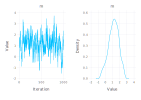

In [23]:
hstack(p[1:2])

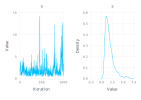

In [24]:
hstack(p[3:4])